**Kate Groschner** <br>
**AY250 Homework 6**

## Question 1

**Feature 1**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skimage 
from skimage import io
from skimage.color import rgb2gray
import os
from skimage import filters
from skimage import feature
from skimage.util import invert
from skimage.morphology import skeletonize
from scipy.signal import correlate2d
import pandas as pd
import cv2

In [2]:
def import_exImg():
    sample_images = {}
    if os.getcwd().split('/')[-1] != '50_categories':
        exit()
    files = os.listdir()
    for idx, direct in enumerate(files):
        if idx == 0:
            pass
        else:
            os.chdir(direct)
            file = os.listdir()[0]
            img = io.imread(file)
            sample_images[direct] = img
            os.chdir('..')
    print('Done!')
    return(sample_images)

In [3]:
os.getcwd()
os.chdir('50_categories')

In [4]:
files = os.listdir()
sample_images = import_exImg()

Done!


In [5]:
def avg_red(img):
    if len(img.shape) == 3:
        avg = img[:,0].mean()
    return avg

In [6]:
def avg_blue(img):
    if len(img.shape) == 3:
        avg = img[:,1].mean()
    return avg

In [7]:
def avg_green(img):
    if len(img.shape) == 3:
        avg = img[:,2].mean()
    return avg

In [8]:
# edges from sobel
def sobel_edges(image):
    edges = filters.sobel(rgb2gray(image))
    edge_hist = np.histogram(edges,bins=250)
    return edge_hist

In [9]:
# number of blobs from difference of gaussian
def blobs_dog(image):
    image_gray = rgb2gray(image)
    blob = feature.blob_dog(image_gray, max_sigma=50, threshold=.1)
    blobs = blob[:,2]
    avg_blob = blobs.mean()
    num_blobs = len(blobs)
    return avg_blob, num_blobs

In [10]:
def blobs_log(image):
    image_gray = rgb2gray(image)
    blob = feature.blob_log(image_gray, max_sigma=5, num_sigma=10, threshold=.1)
    blobs = blob[:,2]
    avg_blob = blobs.mean()
    num_blobs = len(blobs)
    return avg_blob, num_blobs

In [11]:
def fft_hist(image):
    fft = np.log2(abs(np.fft.rfft2(rgb2gray(image))))
    fhist = np.histogram(fft,bins=250,density = True)
    return fft

In [12]:
def lbp_hist(image):
    lbp = feature.local_binary_pattern(rgb2gray(image),30,30)
    lhist = np.histogram(lbp,bins=250,density = True)
    return lhist

In [13]:
# def dense_features(image):
#     gray_image = rgb2gray(image)
#     halfHorz = gray_image.shape[0]//2
#     halfVert = gray_image.shape[1]//2
#     chops = {}
#     chops['chop1'] =gray_image[:halfHorz,:halfVert]
#     chops['chop2'] = gray_image[(halfHorz+1):,:halfVert]
#     chops['chop3'] = gray_image[:halfHorz,(halfVert+1):]
#     chops['chop4'] = gray_image[(halfHorz+1):,(halfVert+1):]
#     corrs = {}
#     corrs['corr12'] = correlate2d(chop1,chop2)
#     corrs['corr13'] = correlate2d(chop1,chop3)
#     corrs['corr14'] = correlate2d(chop1,chop4)
#     corrs['corr23'] = correlate2d(chop2,chop3)
#     corrs['corr24'] = correlate2d(chop2,chop4)
#     corrs['corr34'] = correlate2d(chop3,chop4)
#     results = {}
#     for idx,corr in enumerate(corrs):
#         results['r'+str(idx)] = [corr.argmax]
    

In [14]:
def center_cut(image):
    middle = (image.shape[0]//2,image.shape[1]//2)
    cut = image[(middle[0]-10):(middle[0]+10),(middle[1]-10):(middle[1]+10),:]
    return cut

In [15]:
sampleAirplane = sample_images[files[1]]

In [16]:
lhistAirplane = lbp_hist(sample_images[files[1]])
# plt.plot(lhistAirplane)

In [17]:
lhistAirplane[0].shape

(250,)

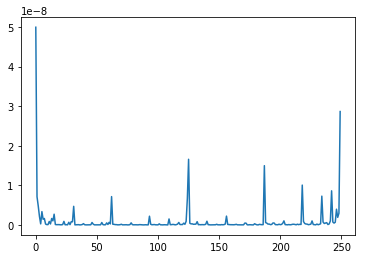

In [18]:
plt.plot(range(0,250),lhistAirplane[0])

In [19]:
fhistAirplane = fft_hist(sample_images[files[32]])
fhistAirplane.shape

(254, 166)

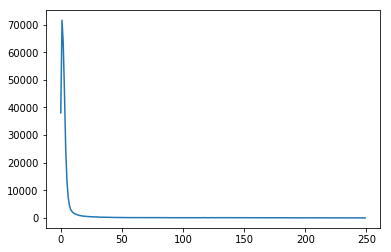

In [20]:
shistAirplane = sobel_edges(sample_images[files[4]])
plt.plot(range(0,250),shistAirplane[0])

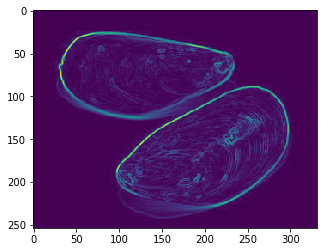

In [21]:
plt.imshow(filters.sobel(rgb2gray(sample_images[files[32]])))

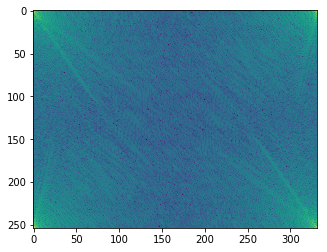

In [22]:
plt.imshow(np.log(abs(np.fft.fft2(rgb2gray(sample_images[files[32]])))))

In [23]:
shistAirplane[0].argmax()

1

In [24]:
def avg_HSV(image):
    img_out = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    results = [img_out[0].mean(),img_out[1].mean(),img_out[2].mean()]
    return results

In [25]:
avg_HSV(sample_images[files[50]])

[89.40679522497705, 88.74196510560147, 88.366391184573]

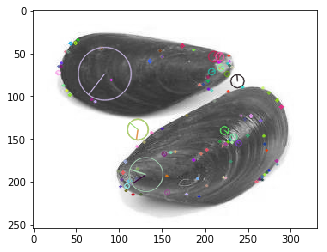

In [26]:

gray= cv2.cvtColor(sample_images[files[32]],cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)
img=0
img=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img)

In [27]:
des.shape

(130, 128)

In [28]:
def sift100(image):
    gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    _, des = sift.detectAndCompute(gray,None)
    if des.shape[0] <= 100:
        dif = 100 - des.shape[0]
        filler = np.zeros((dif,128))
        sift = np.concatenate((des,filler),axis=0).flatten()
    else:
        sift = des[:100,:].flatten()
    return sift

In [99]:
sift100(sample_images[files[32]]).shape

(12800,)

In [30]:
def color_corr(image):
    channels = [image[:,:,0],image[:,:,1],image[:,:,2]]
    avg_corrs = []
    idx = 0
    while idx < 3:
        if idx < 2:
            corrs = correlate2d(channels[0],channels[idx+1],boundary='symm', mode='same')
        else:
            corrs = correlate2d(channels[1],channels[2],boundary='symm', mode='same')
        y, x = np.unravel_index(np.argmax(corrs), corrs.shape)
        avg_corrs.append([x,y])
        idx += 1
    return avg_corrs

In [31]:
color_corr(sampleAirplane)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/kategroschner/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-733fd2aa8e1c>", line 1, in <module>
    color_corr(sampleAirplane)
  File "<ipython-input-30-99abc06b5506>", line 7, in color_corr
    corrs = correlate2d(channels[0],channels[idx+1],boundary='symm', mode='same')
  File "/Users/kategroschner/anaconda/lib/python3.6/site-packages/scipy/signal/signaltools.py", line 1115, in correlate2d
    out = sigtools._convolve2d(in1, in2, 0, val, bval, fillvalue)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/kategroschner/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1828, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_tr

KeyboardInterrupt: 

In [93]:
a = color_hist(sampleAirplane)

In [94]:
a.shape

(768,)

In [105]:
def color_hist(image):
    color = ('b','g','r')
    hist = []
    for i,col in enumerate(color):
        hist.append(cv2.calcHist([image],[i],None,[256],[0,256]))
    return np.asarray(hist).flatten()

In [106]:
a = color_hist(sampleAirplane)

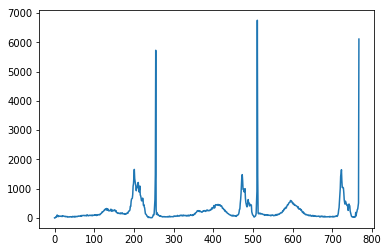

In [108]:
plt.plot(a)

In [33]:
def import_Img():
    images = {}
    if os.getcwd().split('/')[-1] != '50_categories':
        raise
    files = os.listdir()
    for idx, direct in enumerate(files):
        images[direct] = []
        if idx == 0:
            pass
        else:
            os.chdir(direct)
            file_list = os.listdir()
            for file in file_list:
                img = io.imread(file)
                images[direct].append(img)
            print(direct)
            os.chdir('..')
    print('Done!')
    return(images, files)

In [ ]:
os.chdir('..')
img_data, files = import_Img()


In [ ]:
img_df = pd.DataFrame.from_dict(img_data,orient='index')

In [ ]:
img_df[0]

In [70]:
def import_Img(directory):
    os.chdir(directory)
    images = pd.DataFrame()
    if os.getcwd().split('/')[-1] != '50_categories':
        raise('wrong directory')
    files = os.listdir()
    
    for idx, direct in enumerate(files):
        if idx == 0:
            pass
        else:
            os.chdir(direct)
            file_list = os.listdir()
            for file in file_list:
                img = {'label': direct,'image':[io.imread(file)]}
                tmp_df = pd.DataFrame(data = img)
                images = pd.concat([images,tmp_df])
                break
            os.chdir('..')
    print('Done!')
    return(images)

In [71]:
directory = '/Users/kategroschner/Documents/Berkeley2017_2018/AY250/python-ay250-homework/hw_6/50_categories'
img_df = import_Img(directory)

Done!


In [72]:
img_df.head()

,image,label
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",airplanes
0,"[[[115, 110, 106], [116, 111, 107], [119, 114,...",bat
0,"[[[75, 93, 79], [34, 52, 38], [27, 48, 33], [2...",bear
0,"[[[65, 131, 192], [65, 131, 192], [65, 131, 19...",blimp
0,"[[[167, 164, 149], [161, 158, 143], [153, 150,...",camel


In [78]:
str(range(10))

'range(0, 10)'

In [79]:
col = range(10)

In [100]:
type(col)

range

In [101]:
768+12800+3+1200+250+250+2+2+250+1+1+1+1

15529

In [102]:
b = np.arange(0,15529,1)

In [103]:
b.shape

(15529,)

In [104]:
b

array([    0,     1,     2, ..., 15526, 15527, 15528])

In [109]:
def get_features(image):
    features = color_hist(image)
    features.append(sift100(image))
    features.append(avg_HSV(image))
    features.append(center_cut(image))
    features.append(lbp_hist(image))
    features.append(fft_hist(image))
    f,g = blobs_log(image)
    h,i = blobs_dog(image)
    j,k = sobel_edges(image)
    features.append(f,g,h,i,j,k)
    features.append(avg_green(image))
    features.append(avg_blue(image))
    features.append(avg_red(image))
    return features

In [110]:
a = get_features(sampleAirplane)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
features = color_hist(sampleAirplane)
features.append()